## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
#Tensorflow 설치하기


* 데이터 프레임 관련 라이브러리

In [2]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### **나.  학습데이터 불러오기**

In [3]:
path = 'bad_site_data.csv'
data = pd.read_csv(path)

### **다.  데이터 전처리**

In [ ]:
# 전처리가 다 된 데이터셋을 사용하기 때문에 생략하도록 하겠음

In [17]:
# 이 아니라 텍스트 값을 포함하는 열 삭제
df = data.copy()
data.drop('label', axis=1, inplace=True)


### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [18]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:len(data.columns) - 1].values
y = data.iloc[:, len(data.columns) - 1].values

In [19]:
# train_test_split 사용
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=2023)


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [7]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [8]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


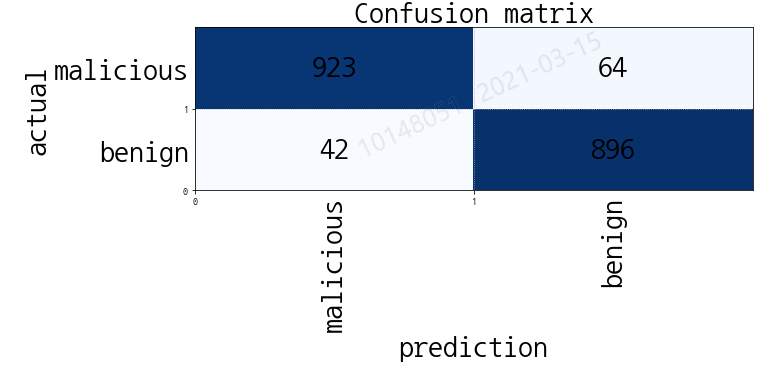

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

#### 1) logistic Regression

In [20]:
# 1. import
from sklearn.tree import DecisionTreeClassifier

# 평가지표
from sklearn.metrics import classification_report, confusion_matrix



In [21]:
# 2.선언 
model = DecisionTreeClassifier(max_depth=5, random_state=2023)



In [22]:
# 3. fit(), 학습
model.fit(train_x, train_y)


DecisionTreeClassifier(max_depth=5, random_state=2023)

In [24]:
# 4. predict(), 예측
y_pred = model.predict(test_x)




In [27]:
# 5. 평가하기
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[439  38]
 [ 36 457]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       477
           1       0.92      0.93      0.93       493

    accuracy                           0.92       970
   macro avg       0.92      0.92      0.92       970
weighted avg       0.92      0.92      0.92       970



In [20]:
# train 및 val 데이터 정확도 확인 




In [28]:
# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(test_y, y_pred))



[[439  38]
 [ 36 457]]


In [19]:
# Feature(특징)별 가중치 확인



In [34]:
data.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label_binary'],
      dtype='object')

In [39]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_port', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label_binary'],
      dtype='object')


(process:2852): GLib-GIO-WARNING **: 18:24:39.786: Unexpectedly, UWP app `64343GTDocStudio.OfficeDocOpener_3.3.2.0_x86__3h5nez1g3qt2c' (AUMId `64343GTDocStudio.OfficeDocOpener_3h5nez1g3qt2c!App') supports 205 extensions but has no verbs


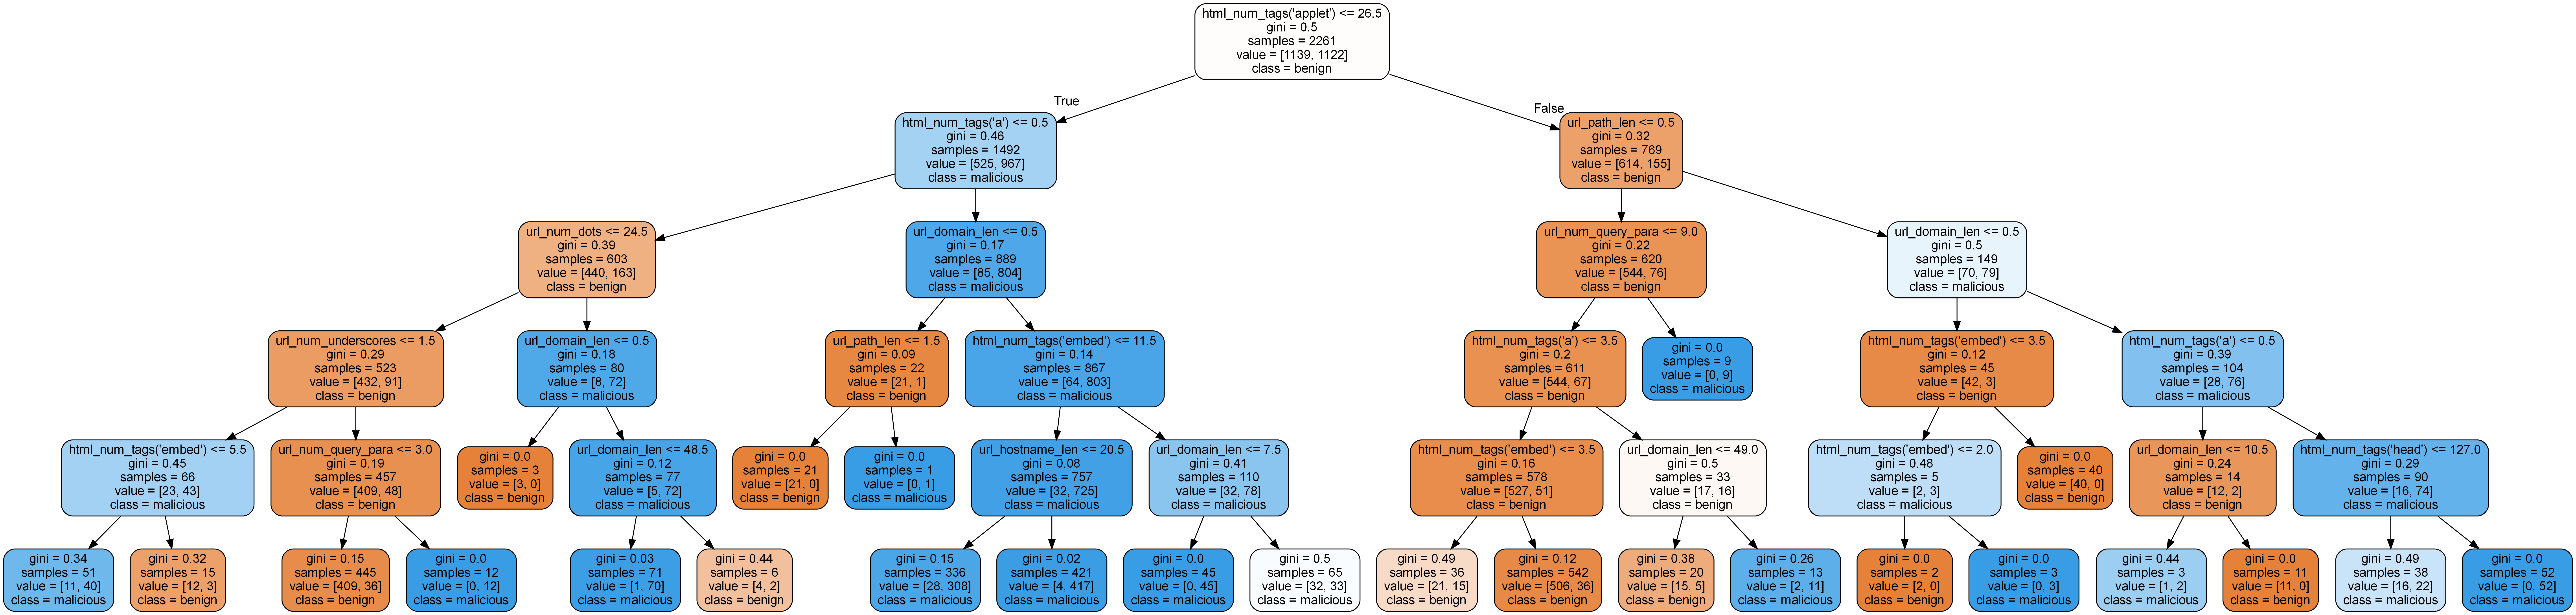

In [41]:
# Decision Tree 시각화
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,
                out_file='bad_site_tree.dot',
                feature_names=data.columns,
                class_names=['benign', 'malicious'],
                rounded=True,
                precision=2,
                max_depth=5,
                filled=True) 

# 파일 변환
!dot bad_site_tree.dot -Tpng -obad_site_tree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='bad_site_tree.png')